In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [31]:
df.drop(columns=['PassengerId', "Name", "SibSp", 'Parch', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [32]:
inputs = df.drop("Survived", axis='columns')
target = df['Survived']

In [33]:
dummies = pd.get_dummies(inputs['Sex']).astype('int')
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [34]:
inputs = pd.concat([inputs, dummies], axis='columns')

In [35]:
inputs.drop("Sex", axis=1, inplace=True)

In [36]:
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [37]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [39]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())

In [42]:
inputs[inputs['Age'].isna()]

,Pclass,Age,Fare,female,male


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [66]:
len(X_train), len(X_test)

(712, 179)

In [67]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [68]:
model.fit(X_train, y_train)

GaussianNB()

In [69]:
model.score(X_test, y_test)

0.7988826815642458

In [75]:
X_test.iloc[:10]

,Pclass,Age,Fare,female,male
707,1,42.000000,26.2875,0,1
44,3,19.000000,7.8792,1,0
589,3,29.699118,8.0500,0,1
499,3,24.000000,7.7958,0,1
246,3,25.000000,7.7750,1,0
415,3,29.699118,8.0500,1,0
835,1,39.000000,83.1583,1,0
834,3,18.000000,8.3000,0,1
694,1,60.000000,26.5500,0,1
832,3,29.699118,7.2292,0,1


In [73]:
y_test.iloc[:10]

707    1
44     1
589    0
499    0
246    0
415    0
835    1
834    0
694    0
832    0
Name: Survived, dtype: int64

In [78]:
model.predict_proba(X_test[:10])

array([[0.92274034, 0.07725966],
       [0.05032636, 0.94967364],
       [0.98926523, 0.01073477],
       [0.98815246, 0.01184754],
       [0.05711216, 0.94288784],
       [0.06158282, 0.93841718],
       [0.00168073, 0.99831927],
       [0.98642301, 0.01357699],
       [0.91161741, 0.08838259],
       [0.98921999, 0.01078001]])

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(model.predict(X_test), y_test)

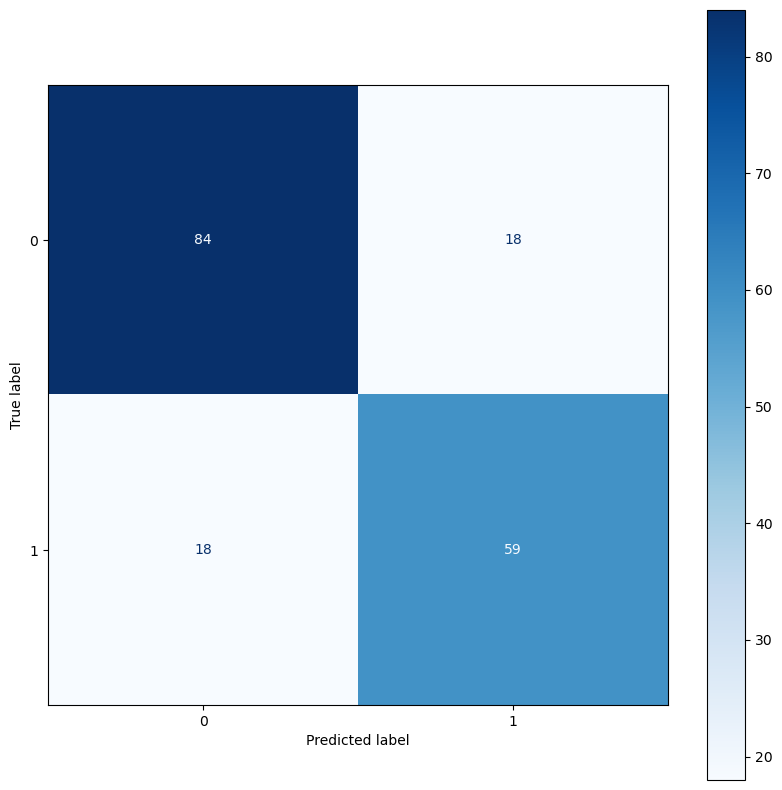

: 

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
dms = ConfusionMatrixDisplay(confusion_matrix=cm)
dms.plot(ax=ax, cmap='Blues')